In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import io

In [150]:
prod = pd.read_csv("../TheAutomators/Production.csv")
res = pd.read_csv("../TheAutomators/Resources.csv")
res.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166 entries, 0 to 165
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   %Time      166 non-null    int64  
 1   Heat_cons  166 non-null    float64
 2   ElecHigh   166 non-null    float64
 3   ElecLow    166 non-null    float64
 4   CO2_cons   166 non-null    float64
 5   Irr        166 non-null    float64
 6   Drain      166 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 9.2 KB


In [151]:
res.rename(columns={"%Time ":"%time"}, inplace=True)
res

,%time,Heat_cons,ElecHigh,ElecLow,CO2_cons,Irr,Drain
0,43815,2.71,1.1,0.0,0.007,0.00,0.00
1,43816,0.92,1.0,0.0,0.009,0.00,0.00
2,43817,0.97,1.0,0.7,0.014,0.00,0.00
3,43818,0.10,0.9,0.5,0.025,0.00,0.00
4,43819,2.24,0.8,0.5,0.017,0.76,0.00
...,...,...,...,...,...,...,...
161,43976,0.43,0.0,0.0,0.065,5.40,2.90
162,43977,0.42,0.0,0.0,0.061,5.40,2.69
163,43978,0.44,0.0,0.0,0.088,5.40,2.33
164,43979,0.98,0.0,0.0,0.101,5.76,2.94


In [152]:
excel_epoch = datetime(1899, 12, 30)    
convert_date_list = [prod, res]
for df in convert_date_list:
# Convert the '%time' column to datetime and format it
    df["%time"] = (excel_epoch + pd.to_timedelta(df["%time"], unit='D')).dt.strftime("%Y-%m-%d %H:%M:%S")
    df.set_index("%time")

In [153]:
res[65:]

,%time,Heat_cons,ElecHigh,ElecLow,CO2_cons,Irr,Drain
65,2020-02-19 00:00:00,2.82,1.6,0.9,0.091,3.36,0.66
66,2020-02-20 00:00:00,2.83,1.6,0.9,0.109,3.12,0.80
67,2020-02-21 00:00:00,2.63,1.6,0.9,0.086,2.64,0.41
68,2020-02-22 00:00:00,2.71,1.6,0.9,0.113,3.36,0.66
69,2020-02-23 00:00:00,2.88,1.6,0.9,0.118,2.88,0.35
...,...,...,...,...,...,...,...
161,2020-05-25 00:00:00,0.43,0.0,0.0,0.065,5.40,2.90
162,2020-05-26 00:00:00,0.42,0.0,0.0,0.061,5.40,2.69
163,2020-05-27 00:00:00,0.44,0.0,0.0,0.088,5.40,2.33
164,2020-05-28 00:00:00,0.98,0.0,0.0,0.101,5.76,2.94


In [132]:
prod

,%time,ProdA,ProdB,avg_nr_harvested_trusses,Truss development time,Nr_fruits_ClassA,Weight_fruits_ClassA,Nr_fruits_ClassB,Weight_fruits_ClassB
0,2020-02-19 00:00:00,0.037,0.000,0.1,50.0,NaN,128.0,0,0
1,2020-02-24 00:00:00,0.767,0.000,0.9,54.5,136.0,1271.0,0,0
2,2020-02-28 00:00:00,0.232,0.000,0.6,51.0,89.0,788.0,0,0
3,2020-03-04 00:00:00,0.778,0.000,1.5,55.1,226.0,2001.0,0,0
4,2020-03-09 00:00:00,0.248,0.000,0.9,53.6,133.0,1144.0,0,0
5,2020-03-13 00:00:00,0.354,0.000,0.7,52.4,83.0,811.0,0,0
6,2020-03-18 00:00:00,0.795,0.000,1.0,53.3,126.0,1230.0,0,0
7,2020-03-23 00:00:00,0.486,0.000,0.9,54.9,148.0,1297.5,0,0
8,2020-03-27 00:00:00,0.454,0.000,0.9,52.6,126.0,1069.0,0,0
9,2020-04-01 00:00:00,0.697,0.000,0.6,54.0,92.0,777.0,0,0


In [156]:
res["%time"] = pd.to_timedelta(res["%time"], unit='6D').dt.strftime("%Y-%m-%d %H:%M:%S")
res.set_index("%time")

ValueError: invalid unit abbreviation: 6D

In [140]:
prod_res = pd.merge(res[65:], prod[["%time","Weight_fruits_ClassA","Weight_fruits_ClassB"]], on="%time", how="outer")
# prod_res = prod_res.loc[:, ~prod_res.columns.duplicated()]
# prod_res.dropna(inplace=True)
prod_res[0:30]



,%time,Heat_cons,ElecHigh,ElecLow,CO2_cons,Irr,Drain,Weight_fruits_ClassA,Weight_fruits_ClassB
0,2020-02-19 00:00:00,2.82,1.6,0.9,0.091,3.36,0.66,128.0,0.0
1,2020-02-20 00:00:00,2.83,1.6,0.9,0.109,3.12,0.80,NaN,NaN
2,2020-02-21 00:00:00,2.63,1.6,0.9,0.086,2.64,0.41,NaN,NaN
3,2020-02-22 00:00:00,2.71,1.6,0.9,0.113,3.36,0.66,NaN,NaN
4,2020-02-23 00:00:00,2.88,1.6,0.9,0.118,2.88,0.35,NaN,NaN
5,2020-02-24 00:00:00,2.96,1.6,0.9,0.072,3.12,0.37,1271.0,0.0
6,2020-02-25 00:00:00,2.70,0.9,0.9,0.074,3.36,0.87,NaN,NaN
7,2020-02-26 00:00:00,3.71,1.6,0.9,0.062,3.60,1.16,NaN,NaN
8,2020-02-27 00:00:00,3.53,1.6,0.9,0.056,4.80,0.66,NaN,NaN
9,2020-02-28 00:00:00,3.23,1.6,0.9,0.070,4.08,1.16,788.0,0.0


In [134]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cols_to_scale = ['Heat_cons', 'ElecHigh', 'ElecLow', 'CO2_cons', 'Irr', 'Drain',
       'Weight_fruits_ClassA', 'Weight_fruits_ClassB']
prod_res[cols_to_scale] = scaler.fit_transform(prod_res[cols_to_scale])
prod_res

,%time,Heat_cons,ElecHigh,ElecLow,CO2_cons,Irr,Drain,Weight_fruits_ClassA,Weight_fruits_ClassB
0,2019-12-16 00:00:00,0.460347,0.057683,-2.177660,-2.236152,-1.900219,-1.242319,NaN,NaN
1,2019-12-17 00:00:00,-1.107238,-0.116414,-2.177660,-2.170691,-1.900219,-1.242319,NaN,NaN
2,2019-12-18 00:00:00,-1.063451,-0.116414,0.171867,-2.007036,-1.900219,-1.242319,NaN,NaN
3,2019-12-19 00:00:00,-1.825350,-0.290511,-0.499426,-1.646996,-1.900219,-1.242319,NaN,NaN
4,2019-12-20 00:00:00,0.048746,-0.464608,-0.499426,-1.908843,-1.568750,-1.242319,NaN,NaN
...,...,...,...,...,...,...,...,...,...
161,2020-05-25 00:00:00,-1.536354,-1.857385,-2.177660,-0.337759,0.454955,0.991720,NaN,NaN
162,2020-05-26 00:00:00,-1.545111,-1.857385,-2.177660,-0.468683,0.454955,0.829945,2.681739,2.997932
163,2020-05-27 00:00:00,-1.527597,-1.857385,-2.177660,0.415052,0.454955,0.552616,NaN,NaN
164,2020-05-28 00:00:00,-1.054694,-1.857385,-2.177660,0.840554,0.611967,1.022535,NaN,NaN


In [135]:
df_melted = pd.melt(
    prod_res,
    id_vars='%time',         # Keep this column fixed
    value_vars=['Irr', 'Drain',
       'Weight_fruits_ClassA', 'Weight_fruits_ClassB'],  # Columns to melt
    var_name='metric',           # New column for metric names
    value_name='value'           # New column for values
)


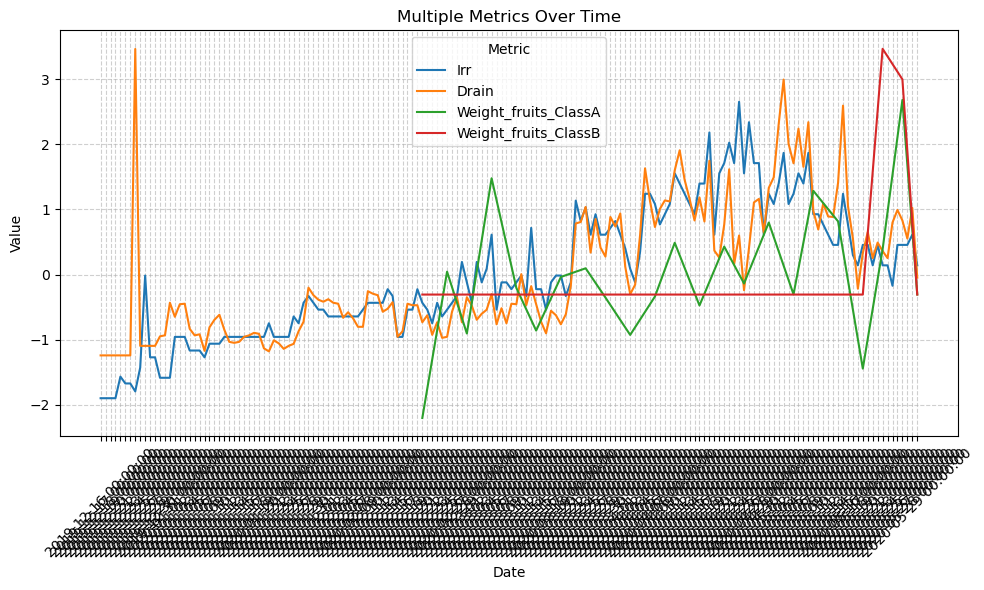

In [137]:
plt.figure(figsize=(10,6))
sns.lineplot(
    data = df_melted,
    x = "%time",
    y = "value",
    hue='metric',
    markers=True
)
plt.title('Multiple Metrics Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.legend(title='Metric')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()